# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
from sklearn.preprocessing import LabelEncoder

# Data Upload

In [2]:
folder_path = r"C:\Users\mehdi\Downloads\case_study"

# Her dosyayı df_0, df_1, ..., df_16 olarak oluştur
for i in range(17):
    file_name = f"{i:012d}.csv"
    file_path = os.path.join(folder_path, file_name)
    globals()[f"df_{i}"] = pd.read_csv(file_path)

# Tüm df_i'leri bir listeye alıp birleştir
dfs = [globals()[f"df_{i}"] for i in range(17)]
df = pd.concat(dfs, ignore_index=True)

# Kontrol
print(df.shape)
print(df.head())

(7293526, 14)
            user_id  event_date platform install_date country  \
0  C6C0A027C49B98BA  2024-02-16  android   2024-02-11     NaN   
1  EE03D492BC0ED08C  2024-03-08      ios   2024-02-01     NaN   
2  5CAA4AF817354059  2024-03-12      ios   2024-03-12     NaN   
3  EF0DE79217D56E72  2024-02-16      ios   2023-07-24     NaN   
4  6DD3D1FC631486F0  2024-03-02  android   2024-03-01     NaN   

   total_session_count  total_session_duration  match_start_count  \
0                    1                  57.721                  0   
1                    0                   0.355                  0   
2                    1                 114.006                  0   
3                    0                   8.157                  0   
4                    1                 233.265                  1   

   match_end_count  victory_count  defeat_count  server_connection_error  \
0                0              0             0                        0   
1                0          

In [56]:
# Kayma sorununu kontrol etmek amacıyla, ilk dosya 000000000000.csv ayrı olarak yüklenip birleştirilmiş DataFrame’in başıyla karşılaştırıldı. İncelemeler sonucunda herhangi bir kayma tespit edilmedi birleştirme sorunsuz ve doğru şekilde gerçekleşmiş.

In [3]:
df.head()

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
0,C6C0A027C49B98BA,2024-02-16,android,2024-02-11,NaN,1,57.721,0,0,0,0,0,0.0,0.0
1,EE03D492BC0ED08C,2024-03-08,ios,2024-02-01,NaN,0,0.355,0,0,0,0,0,0.0,0.0
2,5CAA4AF817354059,2024-03-12,ios,2024-03-12,NaN,1,114.006,0,0,0,0,0,0.0,0.0
3,EF0DE79217D56E72,2024-02-16,ios,2023-07-24,NaN,0,8.157,0,0,0,0,0,0.0,0.0
4,6DD3D1FC631486F0,2024-03-02,android,2024-03-01,NaN,1,233.265,1,0,0,0,0,0.0,0.0


In [4]:
df_0.head()

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
0,C6C0A027C49B98BA,2024-02-16,android,2024-02-11,NaN,1,57.721,0,0,0,0,0,0.0,0.0
1,EE03D492BC0ED08C,2024-03-08,ios,2024-02-01,NaN,0,0.355,0,0,0,0,0,0.0,0.0
2,5CAA4AF817354059,2024-03-12,ios,2024-03-12,NaN,1,114.006,0,0,0,0,0,0.0,0.0
3,EF0DE79217D56E72,2024-02-16,ios,2023-07-24,NaN,0,8.157,0,0,0,0,0,0.0,0.0
4,6DD3D1FC631486F0,2024-03-02,android,2024-03-01,NaN,1,233.265,1,0,0,0,0,0.0,0.0


In [57]:
# Önceki kontrolde olduğu gibi, son dosya olan 000000000016.csv sonu da incelenmiş ve herhangi bir kayma olup olmadığı kontrol edilmiştir. Görünüşe göre bu da başarılı veriler doğru şekilde birleştirilmiştir.

In [5]:
df.tail()

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
7293521,EE63B155FD650A2A,2024-03-15,android,2024-03-01,Georgia,5,32485.022,90,85,33,52,0,0.0,0.112931
7293522,83500BD0932059,2024-03-15,android,2023-05-04,South Korea,4,59808.376,91,90,52,38,0,0.0,0.242054
7293523,FCB494D09F7F2B6B,2024-03-15,android,2023-10-05,Thailand,8,40677.700,110,92,88,4,0,0.0,0.000000
7293524,BE61E43C627C5983,2024-03-15,ios,2022-11-10,Saudi Arabia,3,41773.600,142,101,78,23,0,0.0,0.020550
7293525,4D7ABC1FA24F828F,2024-03-15,ios,2024-03-09,Malaysia,6,33109.872,116,116,114,2,2,0.0,0.330732


In [6]:
df_16.tail()

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
428987,EE63B155FD650A2A,2024-03-15,android,2024-03-01,Georgia,5,32485.022,90,85,33,52,0,0.0,0.112931
428988,83500BD0932059,2024-03-15,android,2023-05-04,South Korea,4,59808.376,91,90,52,38,0,0.0,0.242054
428989,FCB494D09F7F2B6B,2024-03-15,android,2023-10-05,Thailand,8,40677.700,110,92,88,4,0,0.0,0.000000
428990,BE61E43C627C5983,2024-03-15,ios,2022-11-10,Saudi Arabia,3,41773.600,142,101,78,23,0,0.0,0.020550
428991,4D7ABC1FA24F828F,2024-03-15,ios,2024-03-09,Malaysia,6,33109.872,116,116,114,2,2,0.0,0.330732


# EDA

In [7]:
df.shape

(7293526, 14)

In [8]:
print(df.columns)

Index(['user_id', 'event_date', 'platform', 'install_date', 'country',
       'total_session_count', 'total_session_duration', 'match_start_count',
       'match_end_count', 'victory_count', 'defeat_count',
       'server_connection_error', 'iap_revenue', 'ad_revenue'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293526 entries, 0 to 7293525
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  object 
 1   event_date               object 
 2   platform                 object 
 3   install_date             object 
 4   country                  object 
 5   total_session_count      int64  
 6   total_session_duration   float64
 7   match_start_count        int64  
 8   match_end_count          int64  
 9   victory_count            int64  
 10  defeat_count             int64  
 11  server_connection_error  int64  
 12  iap_revenue              float64
 13  ad_revenue               float64
dtypes: float64(3), int64(6), object(5)
memory usage: 779.0+ MB


In [10]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')
df['install_date'] = pd.to_datetime(df['install_date'], format='%Y-%m-%d')

In [11]:
print("Max date :",df["event_date"].max())
print("Min date :",df["event_date"].min())

Max date : 2024-03-15 00:00:00
Min date : 2024-02-15 00:00:00


In [12]:
print("Max date :",df["install_date"].max())
print("Min date :",df["install_date"].min())

Max date : 2024-03-15 00:00:00
Min date : 2017-12-09 00:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293526 entries, 0 to 7293525
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  object        
 1   event_date               datetime64[ns]
 2   platform                 object        
 3   install_date             datetime64[ns]
 4   country                  object        
 5   total_session_count      int64         
 6   total_session_duration   float64       
 7   match_start_count        int64         
 8   match_end_count          int64         
 9   victory_count            int64         
 10  defeat_count             int64         
 11  server_connection_error  int64         
 12  iap_revenue              float64       
 13  ad_revenue               float64       
dtypes: datetime64[ns](2), float64(3), int64(6), object(3)
memory usage: 779.0+ MB


### Missing Values Inspection

In [14]:
df.isnull().sum()

user_id                        0
event_date                     0
platform                       0
install_date                   0
country                    17998
total_session_count            0
total_session_duration         0
match_start_count              0
match_end_count                0
victory_count                  0
defeat_count                   0
server_connection_error        0
iap_revenue                    0
ad_revenue                     0
dtype: int64

In [15]:
df.country.value_counts()

country
Türkiye                     664791
Brazil                      609546
Russia                      519000
United States               513384
India                       364943
                             ...  
Wallis & Futuna                  3
Central African Republic         2
Christmas Island                 1
Lesotho                          1
Comoros                          1
Name: count, Length: 232, dtype: int64

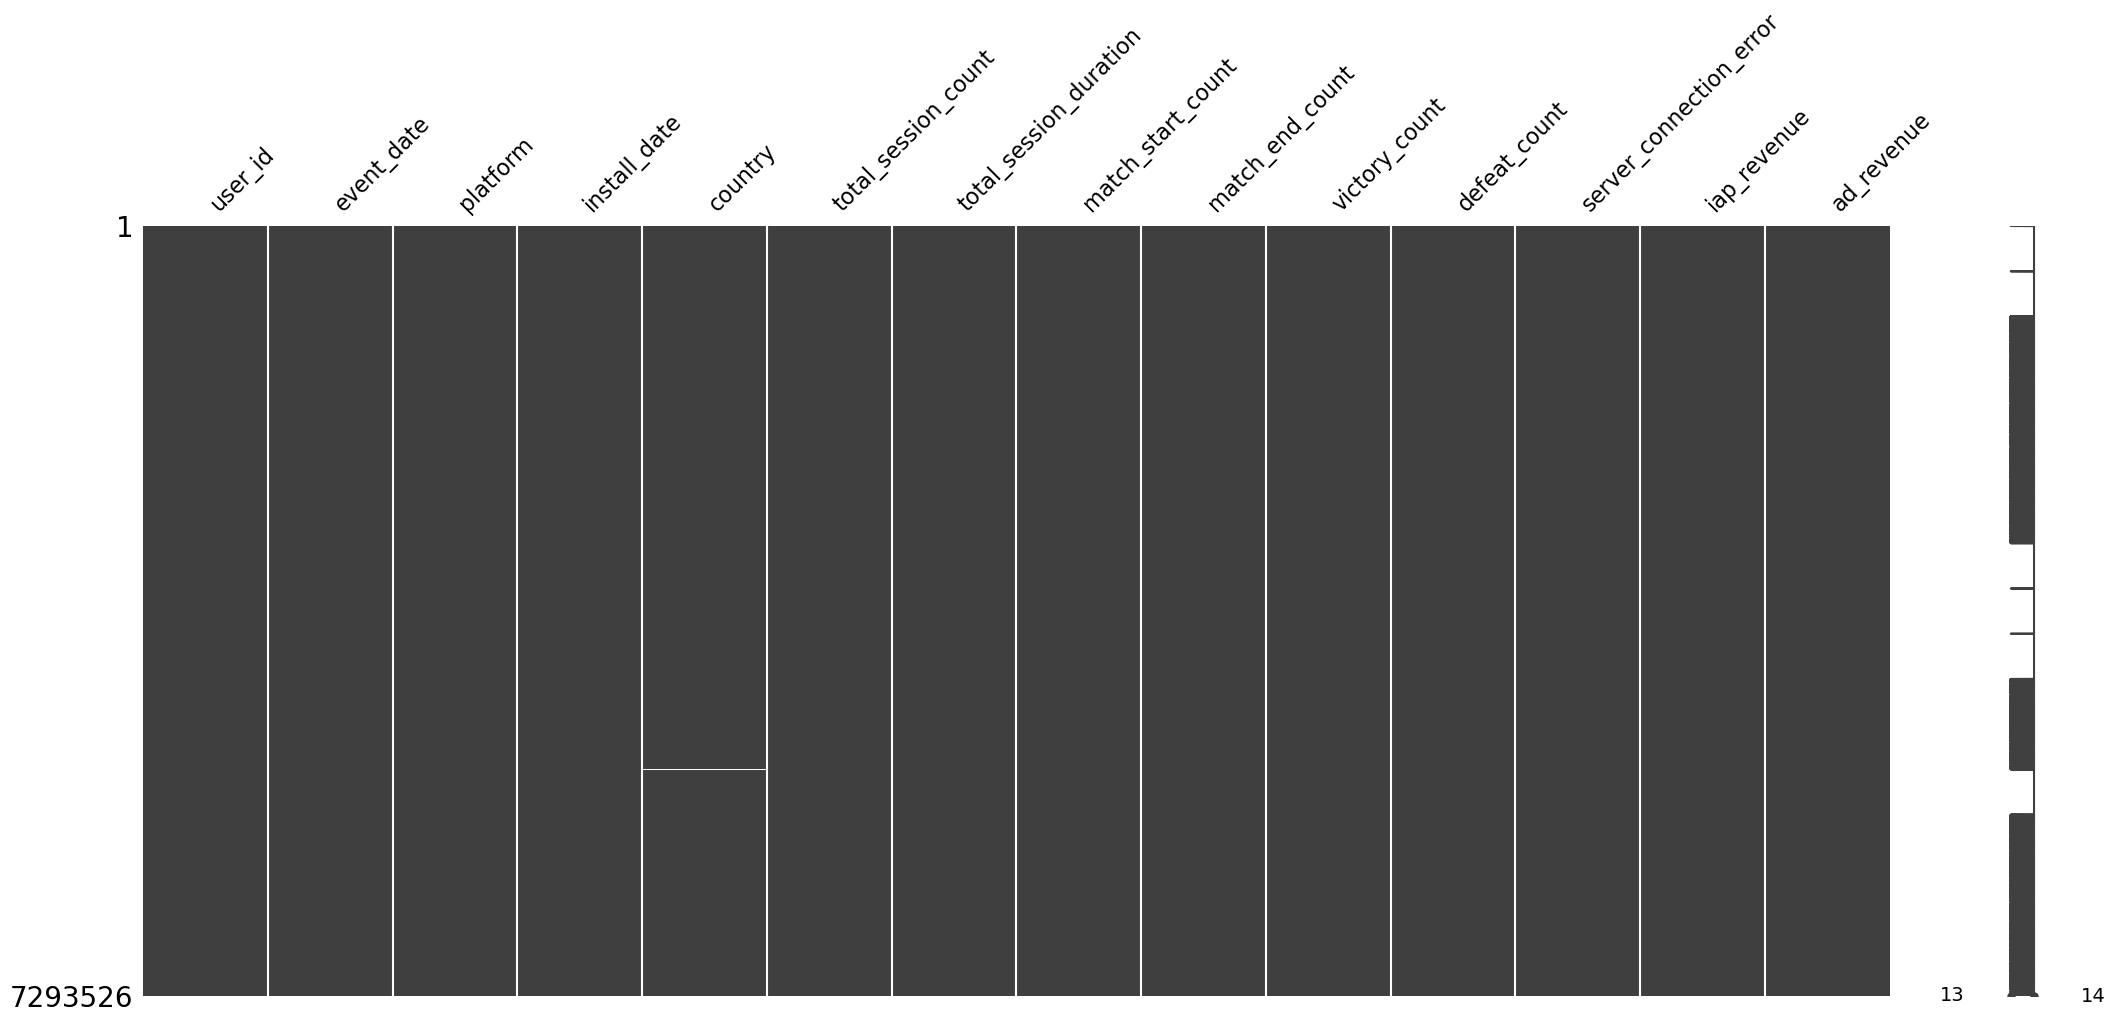

In [16]:
import missingno as msno
msno.matrix(df)
plt.show()

In [16]:
# Toplam gözlem sayısı
total_rows = len(df)

missing_count = df.isnull().sum()


missing_ratio = (missing_count / total_rows)

missing_df = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percent': missing_ratio
})

print(missing_df)

                         Missing_Count  Missing_Percent
user_id                              0         0.000000
event_date                           0         0.000000
platform                             0         0.000000
install_date                         0         0.000000
country                          17998         0.002468
total_session_count                  0         0.000000
total_session_duration               0         0.000000
match_start_count                    0         0.000000
match_end_count                      0         0.000000
victory_count                        0         0.000000
defeat_count                         0         0.000000
server_connection_error              0         0.000000
iap_revenue                          0         0.000000
ad_revenue                           0         0.000000


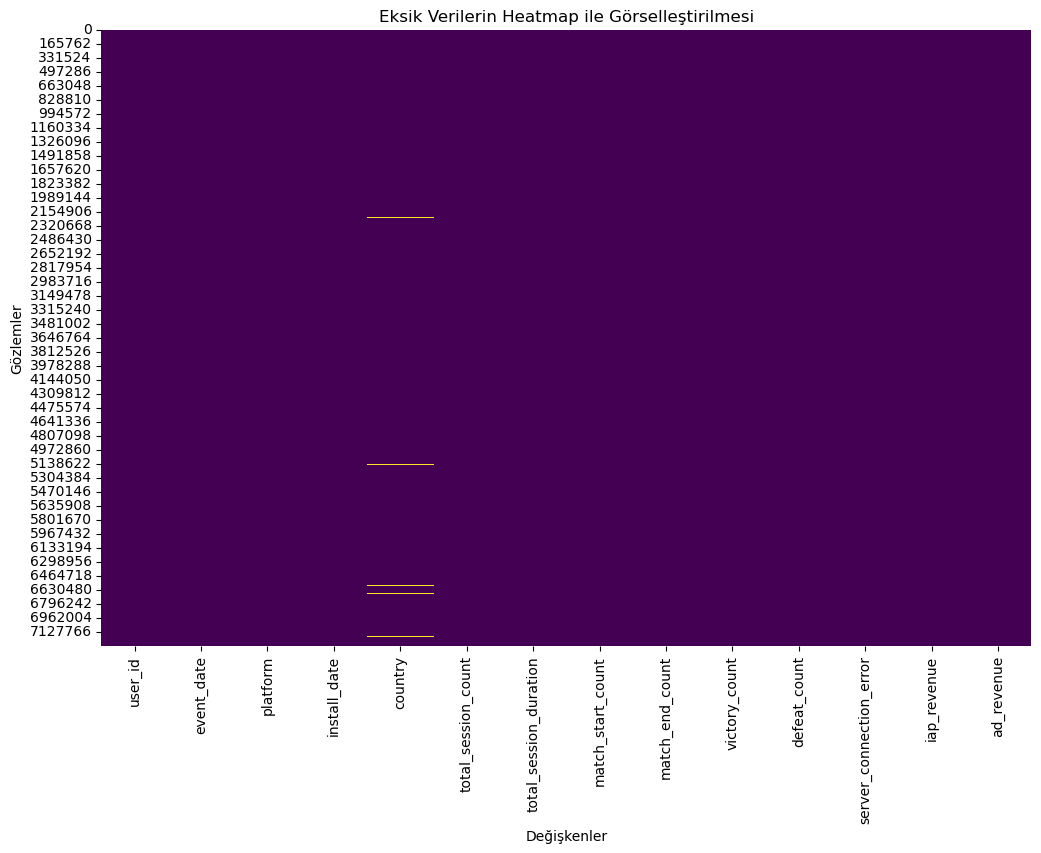

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Verilerin Heatmap ile Görselleştirilmesi")
plt.xlabel("Değişkenler")
plt.ylabel("Gözlemler")
plt.show()

In [17]:
missing_mask = df['country'].isnull().astype(int)

# Sayısal değişkenlerle korelasyon
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corrwith(missing_mask)
print(corr)

total_session_count       -0.030430
total_session_duration    -0.020503
match_start_count         -0.017069
match_end_count           -0.016596
victory_count             -0.014233
defeat_count              -0.014650
server_connection_error    0.012211
iap_revenue               -0.001360
ad_revenue                -0.004103
dtype: float64


In [18]:
# Eksik gözlemleri sil
df = df.dropna()

In [19]:
df.isnull().sum()

user_id                    0
event_date                 0
platform                   0
install_date               0
country                    0
total_session_count        0
total_session_duration     0
match_start_count          0
match_end_count            0
victory_count              0
defeat_count               0
server_connection_error    0
iap_revenue                0
ad_revenue                 0
dtype: int64

In [20]:
df.reset_index(drop=True,inplace=True)

### Veri Keşfi

In [21]:
df.describe(include=["int","float"]).T

,count,mean,std,min,25%,50%,75%,max
total_session_count,7275528.0,1.737711,1.294854,0.0,1.000,1.000,2.00000,3.600000e+01
total_session_duration,7275528.0,1848.177429,3208.516973,0.0,217.604,709.489,2050.55300,1.233541e+06
match_start_count,7275528.0,4.735000,8.229149,0.0,1.000,2.000,5.00000,6.830000e+02
match_end_count,7275528.0,3.917658,7.011672,0.0,0.000,2.000,5.00000,2.740000e+02
victory_count,7275528.0,2.436181,4.974297,0.0,0.000,1.000,3.00000,2.710000e+02
defeat_count,7275528.0,1.481477,3.110725,0.0,0.000,0.000,1.00000,1.270000e+02
server_connection_error,7275528.0,0.033377,0.414669,0.0,0.000,0.000,0.00000,2.150000e+02
iap_revenue,7275528.0,0.128290,4.277687,0.0,0.000,0.000,0.00000,2.790235e+03
ad_revenue,7275528.0,0.020088,0.094586,0.0,0.000,0.000,0.01148,3.236633e+01


### Correlation Analysis

In [22]:
def encode_categorical_columns(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns  # Sayısal olmayan sütunları seç
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Label encoding işlemi
    
    return df

In [23]:
df_ = df.copy()

In [24]:
encode_categorical_columns(df_)

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
0,2274867,2024-03-07,0,2023-12-01,51,1,44.626,0,0,0,0,0,0.0,0.000000
1,2097933,2024-02-24,0,2024-01-19,51,1,0.000,0,0,0,0,0,0.0,0.000000
2,2206138,2024-02-16,0,2022-12-19,51,1,107.034,1,0,0,0,0,0.0,0.000000
3,2214250,2024-02-27,0,2024-02-23,51,1,289.811,1,0,0,0,0,0.0,0.000000
4,625580,2024-03-03,1,2023-02-24,51,1,1443.541,1,1,1,0,0,0.0,0.014819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275523,2257746,2024-03-15,0,2024-03-01,76,5,32485.022,90,85,33,52,0,0.0,0.112931
7275524,1170747,2024-03-15,0,2023-05-04,187,4,59808.376,91,90,52,38,0,0.0,0.242054
7275525,2402567,2024-03-15,0,2023-10-05,205,8,40677.700,110,92,88,4,0,0.0,0.000000
7275526,1770566,2024-03-15,1,2022-11-10,175,3,41773.600,142,101,78,23,0,0.0,0.020550


In [25]:
corr_matrix = df_.corr()

In [28]:
corr_matrix

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
user_id,1.000000,0.000321,-0.000655,-0.001017,-0.000268,-0.001958,-0.001415,-0.000573,-0.001745,-0.001385,-0.001718,-0.000100,-0.000826,0.000558
event_date,0.000321,1.000000,0.022714,0.035989,0.008224,0.000304,0.002624,-0.004288,-0.005488,-0.009225,0.002381,0.000296,-0.000655,0.003593
platform,-0.000655,0.022714,1.000000,-0.123007,0.113704,0.043300,0.028034,0.032210,0.028910,0.018880,0.034974,0.005413,0.014682,0.054910
install_date,-0.001017,0.035989,-0.123007,1.000000,-0.030805,-0.073335,-0.090108,-0.060704,-0.036309,-0.029440,-0.034765,-0.001050,-0.006897,0.011347
country,-0.000268,0.008224,0.113704,-0.030805,1.000000,0.027234,0.023447,0.025051,0.023644,0.023989,0.014934,-0.000075,0.007396,0.036876
total_session_count,-0.001958,0.000304,0.043300,-0.073335,0.027234,1.000000,0.627766,0.614402,0.589198,0.515939,0.503043,0.069970,0.045139,0.143425
total_session_duration,-0.001415,0.002624,0.028034,-0.090108,0.023447,0.627766,1.000000,0.890239,0.868882,0.785103,0.703045,0.082486,0.068160,0.237428
match_start_count,-0.000573,-0.004288,0.032210,-0.060704,0.025051,0.614402,0.890239,1.000000,0.942937,0.878403,0.720774,0.066957,0.069904,0.195197
match_end_count,-0.001745,-0.005488,0.028910,-0.036309,0.023644,0.589198,0.868882,0.942937,1.000000,0.920785,0.781622,0.056741,0.074667,0.213457
victory_count,-0.001385,-0.009225,0.018880,-0.029440,0.023989,0.515939,0.785103,0.878403,0.920785,1.000000,0.476399,0.054015,0.074085,0.185765


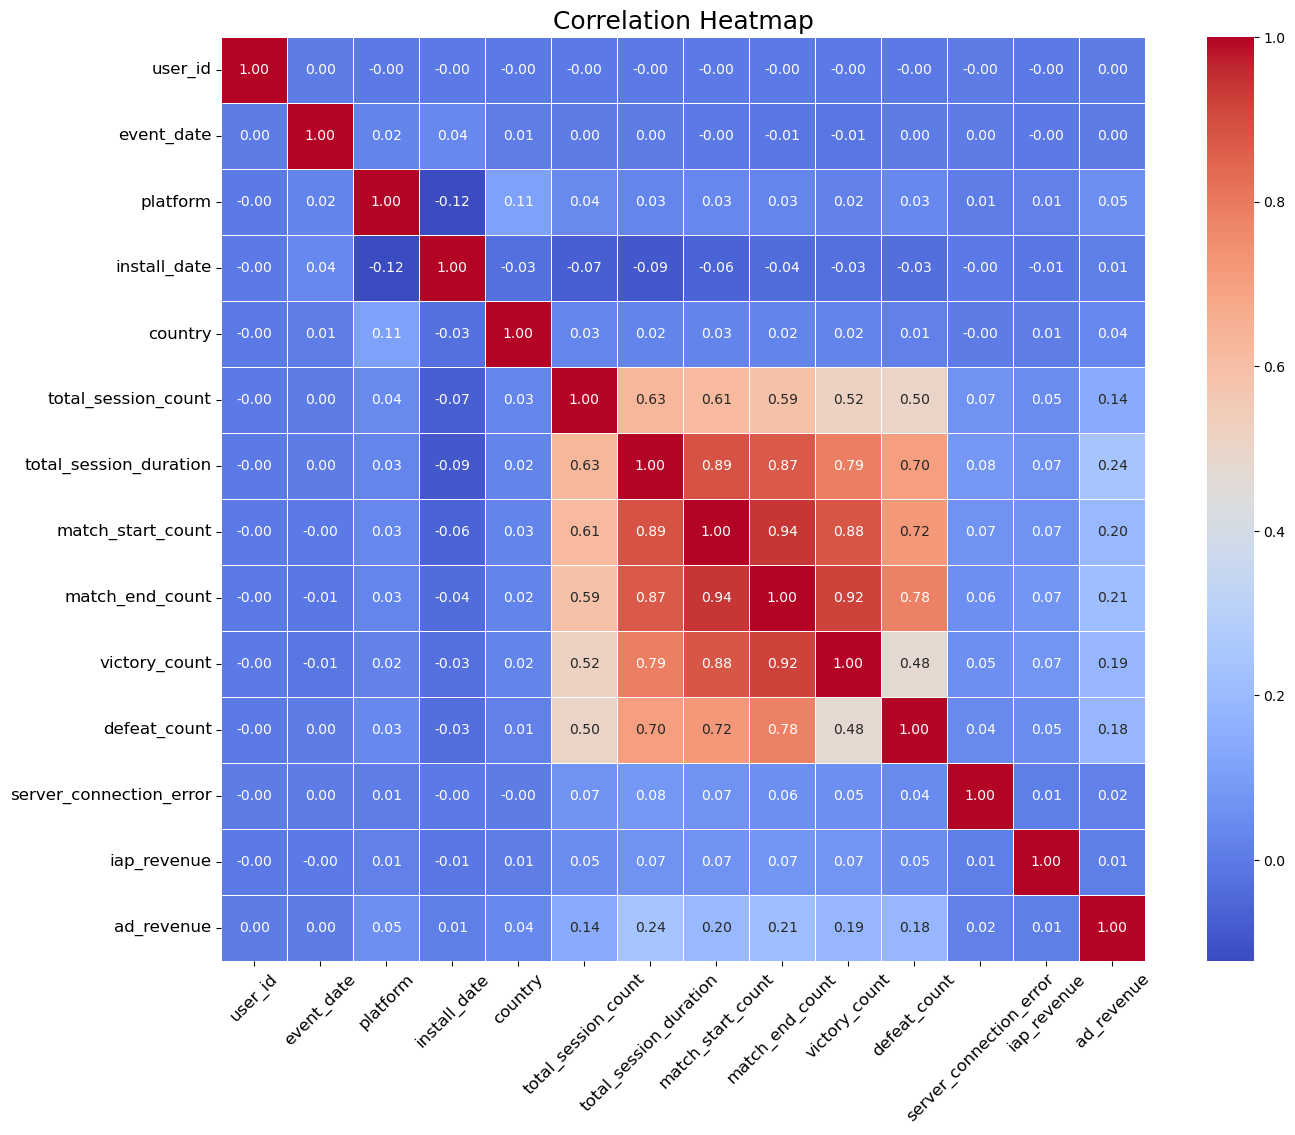

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [27]:
def report_high_correlations(corr_matrix, threshold=0.70):
    """
    Reports variable pairs with correlation above a given threshold.
    Avoids duplicate pairs (e.g., A-B and B-A).
    """

    reported_pairs = set()

    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                corr_value = corr_matrix.loc[col1, col2]

                pair = tuple(sorted([col1, col2]))
                if abs(corr_value) >= threshold and pair not in reported_pairs:
                    reported_pairs.add(pair)

                    if corr_value > 0:
                        relation = "a strong positive correlation"
                    else:
                        relation = "a strong negative correlation"

                    print(f"There is {relation} between '{col1}' and '{col2}' (corr = {corr_value:.2f}).")


In [28]:
report_high_correlations(corr_matrix, threshold=0.70)

There is a strong positive correlation between 'total_session_duration' and 'match_start_count' (corr = 0.89).
There is a strong positive correlation between 'total_session_duration' and 'match_end_count' (corr = 0.87).
There is a strong positive correlation between 'total_session_duration' and 'victory_count' (corr = 0.79).
There is a strong positive correlation between 'total_session_duration' and 'defeat_count' (corr = 0.70).
There is a strong positive correlation between 'match_start_count' and 'match_end_count' (corr = 0.94).
There is a strong positive correlation between 'match_start_count' and 'victory_count' (corr = 0.88).
There is a strong positive correlation between 'match_start_count' and 'defeat_count' (corr = 0.72).
There is a strong positive correlation between 'match_end_count' and 'victory_count' (corr = 0.92).
There is a strong positive correlation between 'match_end_count' and 'defeat_count' (corr = 0.78).


In [29]:
def correlation_report(df, target_var, threshold=0.7):
    """
    Prints correlation insights for a given variable.
    
    Parameters:
    - df: pandas DataFrame
    - target_var: variable to check correlations against
    - threshold: minimum absolute correlation value to report
    """

    corr_matrix = df.corr()

    if target_var not in corr_matrix.columns:
        print(f"Variable '{target_var}' not found in the dataframe.")
        return

    for col in corr_matrix.columns:
        if col == target_var:
            continue  # skip same variable

        corr_value = corr_matrix.loc[target_var, col]

        if abs(corr_value) >= threshold:
            relation = "positive" if corr_value > 0 else "negative"
            print(f"There is a strong {relation} correlation ({corr_value:.2f}) between '{target_var}' and '{col}'.")


In [30]:
correlation_report(corr_matrix, "iap_revenue", threshold=0.11)

There is a strong negative correlation (-0.11) between 'iap_revenue' and 'user_id'.
There is a strong negative correlation (-0.12) between 'iap_revenue' and 'event_date'.
There is a strong negative correlation (-0.12) between 'iap_revenue' and 'country'.
There is a strong negative correlation (-0.11) between 'iap_revenue' and 'total_session_count'.
There is a strong negative correlation (-0.11) between 'iap_revenue' and 'server_connection_error'.
There is a strong negative correlation (-0.15) between 'iap_revenue' and 'ad_revenue'.


In [31]:
correlation_report(corr_matrix, "ad_revenue", threshold=0.20)

There is a strong positive correlation (0.25) between 'ad_revenue' and 'total_session_duration'.
There is a strong positive correlation (0.22) between 'ad_revenue' and 'match_start_count'.
There is a strong positive correlation (0.23) between 'ad_revenue' and 'match_end_count'.
There is a strong positive correlation (0.22) between 'ad_revenue' and 'victory_count'.
There is a strong positive correlation (0.23) between 'ad_revenue' and 'defeat_count'.


### Platform Distribution

In [32]:
df['platform'].value_counts()

platform
android    4756614
ios        2518914
Name: count, dtype: int64

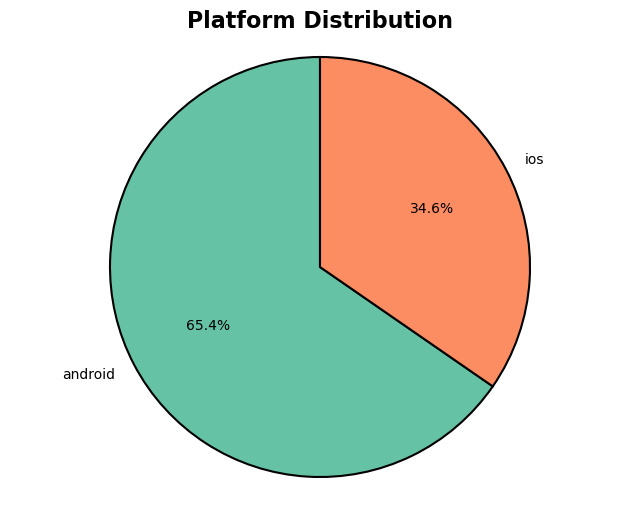

In [33]:
geography_counts = df["platform"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct="%1.1f%%", colors=plt.cm.Set2.colors, startangle=90, 
        wedgeprops={"edgecolor": "black", "linewidth": 1.5, "linestyle": "solid"})
plt.title("Platform Distribution", fontsize=16, weight="bold")
plt.axis("equal")  
plt.show()

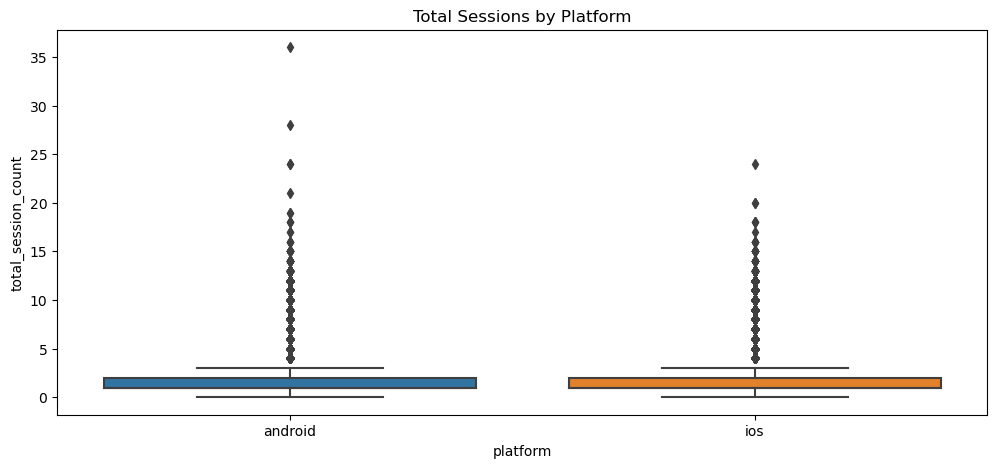

In [34]:
# 3. Platform ve country bazında total_session_count karşılaştırması
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='platform', y='total_session_count')
plt.title("Total Sessions by Platform")
plt.show()


### Top 7 most frequent countries

In [35]:
df['country'].value_counts().head(7)

country
Türkiye          664791
Brazil           609546
Russia           519000
United States    513384
India            364943
Vietnam          305653
Ukraine          267029
Name: count, dtype: int64

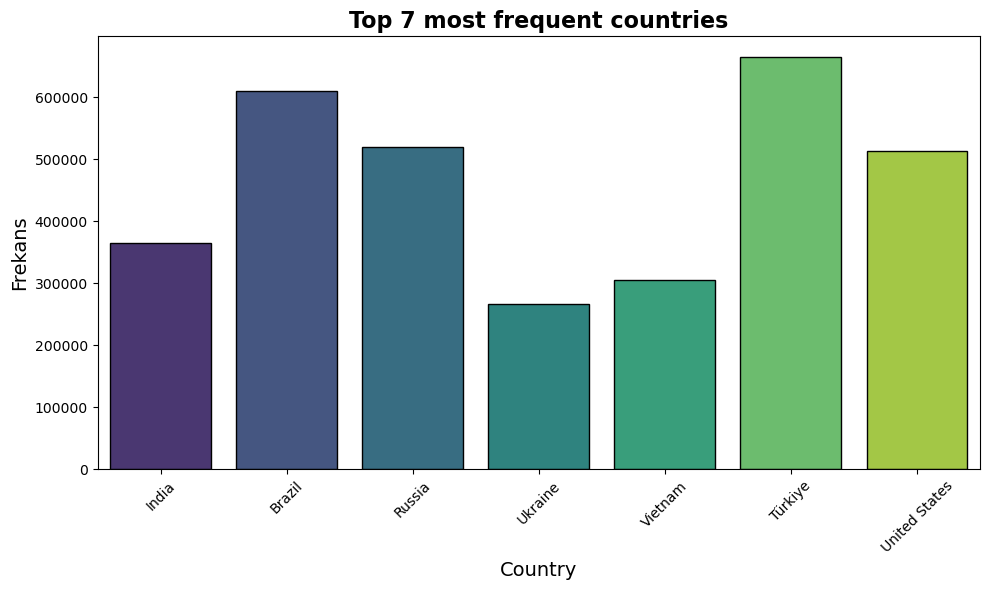

In [36]:
# En çok görülen ilk 7 ülkeyi al
top7 = df['country'].value_counts().head(7).index

# Sadece bu 7 ülkeyi filtrele
df_top7 = df[df['country'].isin(top7)]

plt.figure(figsize=(10, 6))
sns.countplot(
    x="country",
    data=df_top7,
    palette="viridis",
    edgecolor="black"
)


plt.title("Top 7 most frequent countries", fontsize=16, weight="bold")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Frekans", fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

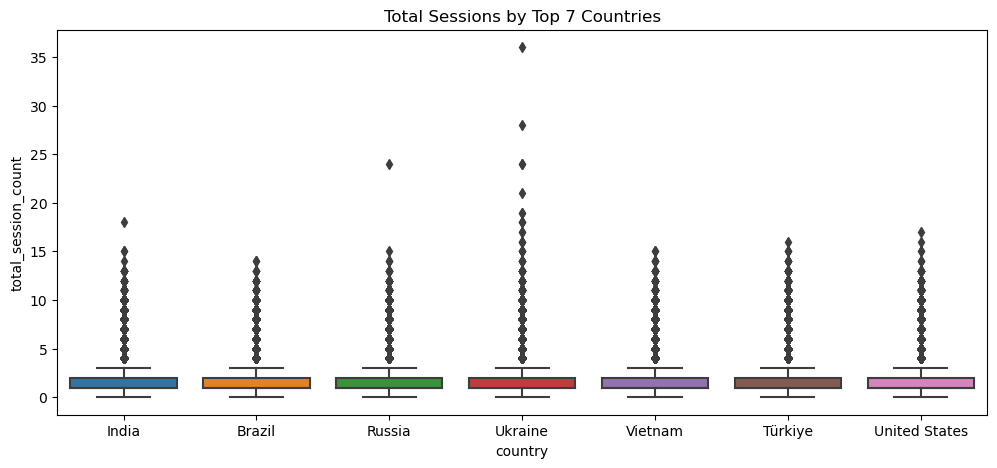

In [37]:

# En sık görülen 7 ülkeyi al
top_countries = df['country'].value_counts().head(7).index

# Veri setini filtrele
df_top = df[df['country'].isin(top_countries)]

# Boxplot
plt.figure(figsize=(12,5))
sns.boxplot(data=df_top, x='country', y='total_session_count')
plt.title("Total Sessions by Top 7 Countries")
plt.show()

### Daily Active User (DAU) Composition

--- 2. Daily Active User (DAU) Composition ---


<Figure size 1400x700 with 0 Axes>

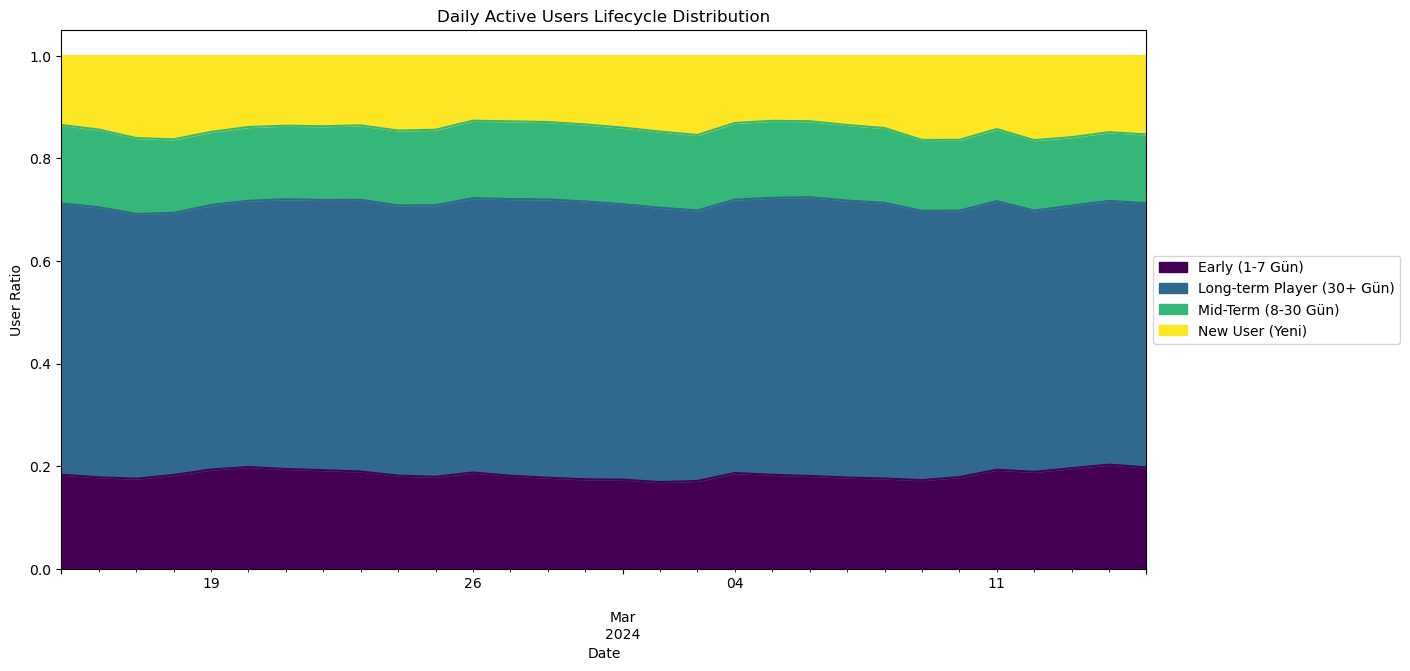

In [38]:
df['days_since_install'] = (df['event_date'] - df['install_date']).dt.days

print("--- 2. Daily Active User (DAU) Composition ---")

def user_age_group(days):
    if days == 0: return 'New User (Yeni)'
    elif days <= 7: return 'Early (1-7 Gün)'
    elif days <= 30: return 'Mid-Term (8-30 Gün)'
    else: return 'Long-term Player (30+ Gün)'

df['user_lifecycle'] = df['days_since_install'].apply(user_age_group)

# Günlük bazda gruplama
daily_composition = df.groupby(['event_date', 'user_lifecycle'])['user_id'].nunique().unstack().fillna(0)

# Yüzdesel Stacked Area Chart
daily_composition_pct = daily_composition.div(daily_composition.sum(axis=1), axis=0)

plt.figure(figsize=(14, 7))
daily_composition_pct.plot(kind='area', stacked=True, colormap='viridis', figsize=(14,7))
plt.title('Daily Active Users Lifecycle Distribution')
plt.ylabel('User Ratio')
plt.xlabel('Date')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Victory and Defeat

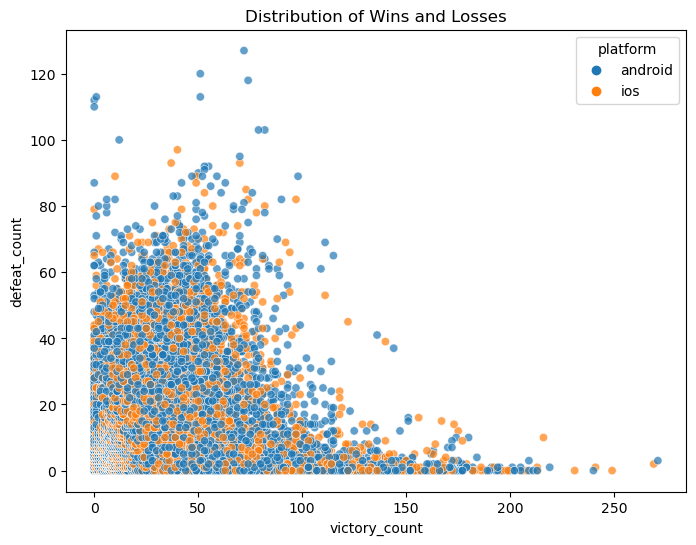

In [39]:
# 4. Victory ve defeat sayısına göre scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='victory_count', y='defeat_count', hue='platform', alpha=0.7)
plt.title("Distribution of Wins and Losses")
plt.show()

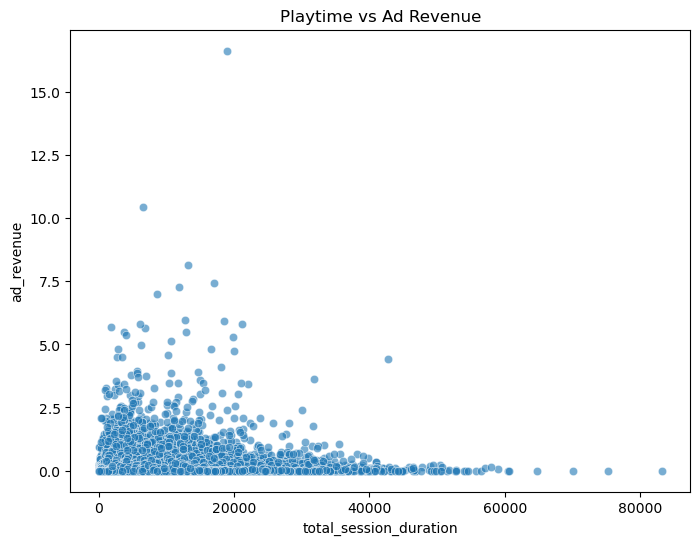

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_8, x='total_session_duration', y='ad_revenue', alpha=0.6)
plt.title("Playtime vs Ad Revenue")
plt.show()

# Feature Engineering

In [53]:
# Kullanıcının kurulumdan sonra kaçıncı günde olduğunu hesapla (Life Time Day)
df['days_since_install'] = (df['event_date'] - df['install_date']).dt.days

# Kazanma Oranı (Win Rate) - Sıfıra bölme hatasını önleyerek
df['total_matches'] = df['victory_count'] + df['defeat_count']
df['win_rate'] = df.apply(lambda x: x['victory_count'] / x['total_matches'] if x['total_matches'] > 0 else 0, axis=1)

# Toplam Gelir
df['total_revenue'] = df['iap_revenue'] + df['ad_revenue']

In [54]:
# ---------------------------------------------------------
# ANALİZ 1: İLK GÜN SEGMENTASYONU
# ---------------------------------------------------------
print("--- Analiz 1: İlk Gün Segmentasyonu ---")

# Sadece Day 0 verisini al
day0_data = df[df['days_since_install'] == 0].copy()

def segment_user(duration):
    if duration < 300: 
        return 'Tourist (<5 min)'
    elif duration < 1200: 
        return 'Potential (5-20 min)'
    else: 
        return 'Fanatic (>20 min)'

day0_data['segment'] = day0_data['total_session_duration'].apply(segment_user)

user_segments = day0_data[['user_id', 'segment']].drop_duplicates()
df = df.merge(user_segments, on='user_id', how='left')

# Segmentlerin Toplam Gelir Ortalaması (LTV tahmini)
segment_revenue = df.groupby('segment')['total_revenue'].mean().sort_values()

--- Analiz 1: İlk Gün Segmentasyonu ---


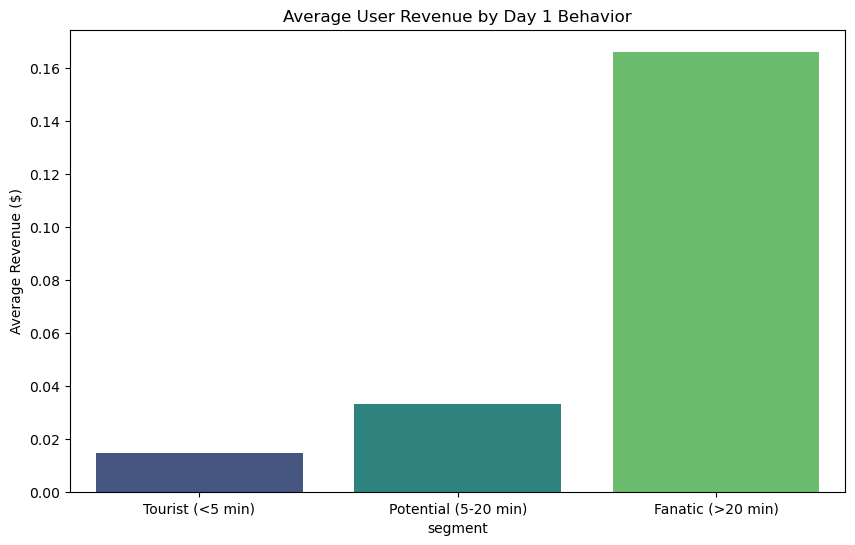

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette='viridis')
plt.title('Average User Revenue by Day 1 Behavior')
plt.ylabel('Average Revenue ($)')
plt.show()

In [55]:
retention_view = df[df['days_since_install'] <= 30]

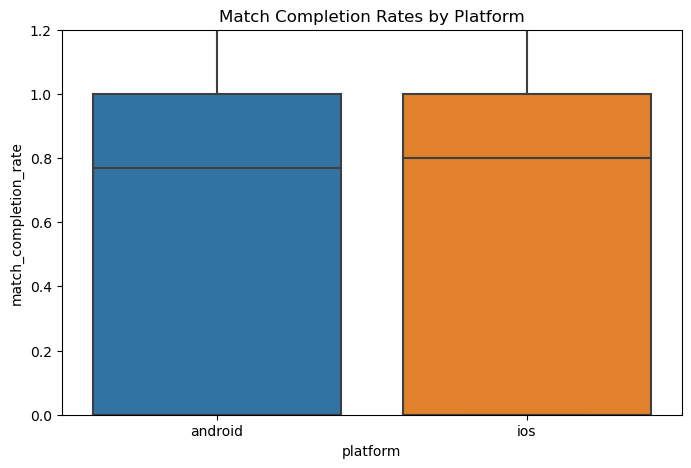

In [45]:
#  Platform Bazlı Maç Tamamlama
# ---------------------------------------------------------
df['match_completion_rate'] = df.apply(lambda x: x['match_end_count'] / x['match_start_count'] if x['match_start_count'] > 0 else 0, axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='platform', y='match_completion_rate')
plt.title('Match Completion Rates by Platform')
plt.ylim(0, 1.2) # Outlierları biraz bastırmak için
plt.show()

In [46]:
# Son analiz tarihini belirle (Veri setindeki en son tarih referans alınır)
analysis_date = df['event_date'].max() + pd.Timedelta(days=1)

# ---------------------------------------------------------
# RFM SEGMENTASYONU
# ---------------------------------------------------------
print("--- RFM Analizi ve Segmentasyon ---")

# Kullanıcı bazında RFM metriklerini hesapla
rfm = df.groupby('user_id').agg({
    'event_date': lambda x: (analysis_date - x.max()).days,
    'user_id': 'count', 
    'total_revenue': 'sum' 
}).rename(columns={'event_date': 'Recency', 'user_id': 'Frequency', 'total_revenue': 'Monetary'})

# Skorlama (1-5 arası puan veriyoruz, qcut ile yüzdelik dilimlere bölerek)
# Recency: Düşük olması iyidir (etiketleri ters veriyoruz)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)

def define_segment(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    
    if r >= 5 and f >= 5: return 'Champions'
    if r >= 5 and f >= 4: return 'Loyal Users'
    if r >= 4 and f <= 2: return 'Newcomers'
    if r <= 2 and f >= 5: return 'Lost Loyals'  # Used to come often but no longer
    if r <= 2 and f <= 2: return 'Sleeping (Lost)'
    return 'At Risk / Average'


rfm['Segment'] = rfm.apply(define_segment, axis=1)

--- RFM Analizi ve Segmentasyon ---


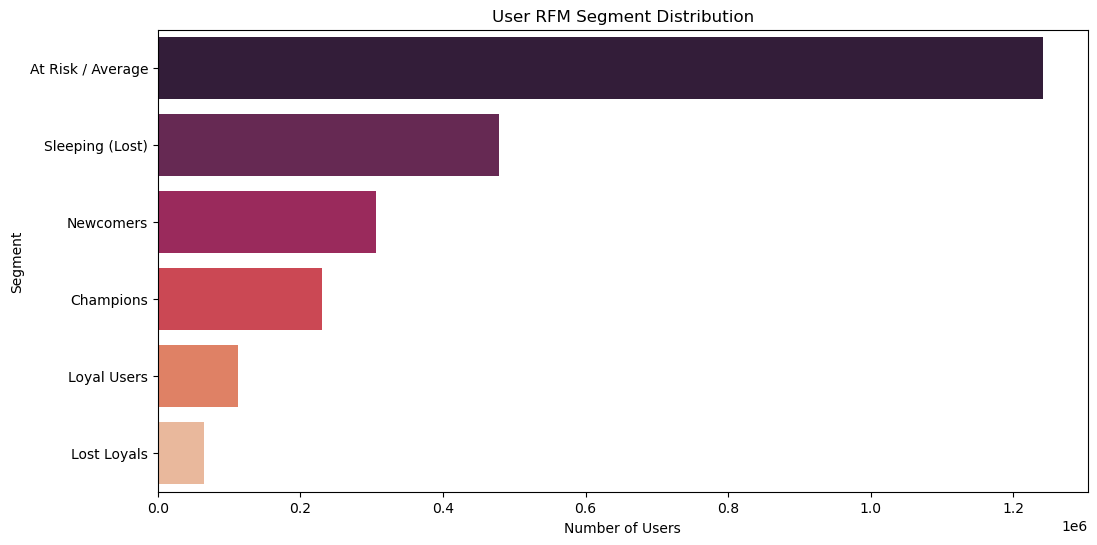

In [47]:
# Görselleştirme: Segment Dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='rocket')
plt.title('User RFM Segment Distribution')
plt.xlabel('Number of Users')
plt.show()

#  ÜLKE BAZLI GELİR DAVRANIŞI (IAP vs ADS)

--- Analiz 1: Ülkelerin Gelir Karakteristiği ---


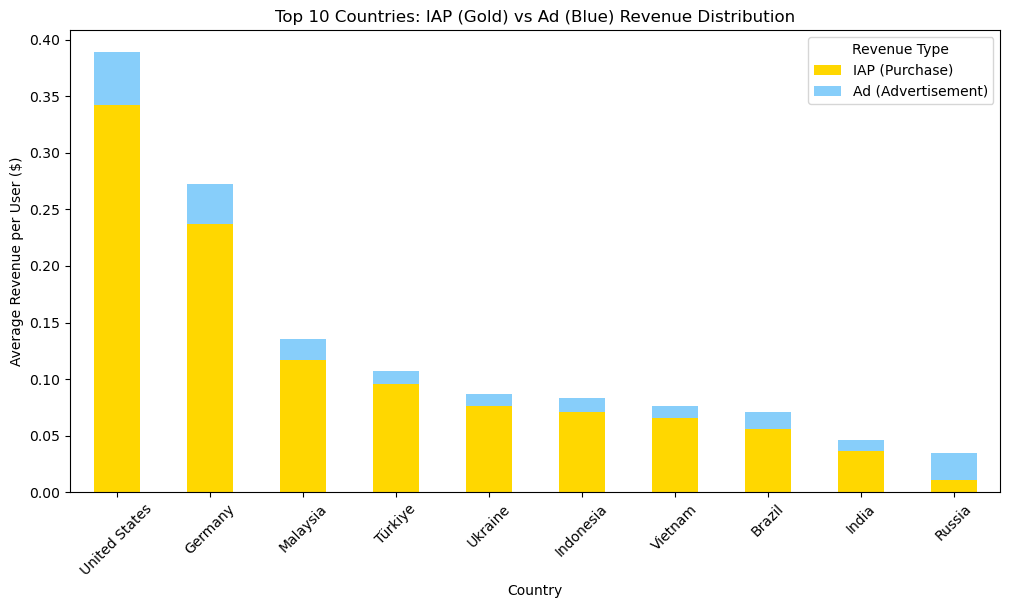

In [48]:
df['day_name'] = df['event_date'].dt.day_name()
# Haftanın günleri
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ---------------------------------------------------------
#  ÜLKE BAZLI GELİR DAVRANIŞI (IAP vs ADS)
# ---------------------------------------------------------
print("--- Analiz 1: Ülkelerin Gelir Karakteristiği ---")

# En çok kullanıcısı olan ilk 10 ülke
top_countries = df['country'].value_counts().nlargest(10).index
country_df = df[df['country'].isin(top_countries)]

# Ülke bazında ortalama IAP ve Reklam Geliri
country_revenue = country_df.groupby('country')[['iap_revenue', 'ad_revenue']].mean().sort_values(by='iap_revenue', ascending=False)

# Stacked Bar Chart çizelim
country_revenue.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FFD700', '#87CEFA'])
plt.title('Top 10 Countries: IAP (Gold) vs Ad (Blue) Revenue Distribution')
plt.ylabel('Average Revenue per User ($)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Revenue Type', labels=['IAP (Purchase)', 'Ad (Advertisement)'])
plt.show()

# HAFTANIN GÜNLERİ ETKİSİ (Weekend Warriors)

--- Analiz 3: Haftanın Günlerine Göre Aktivite ---


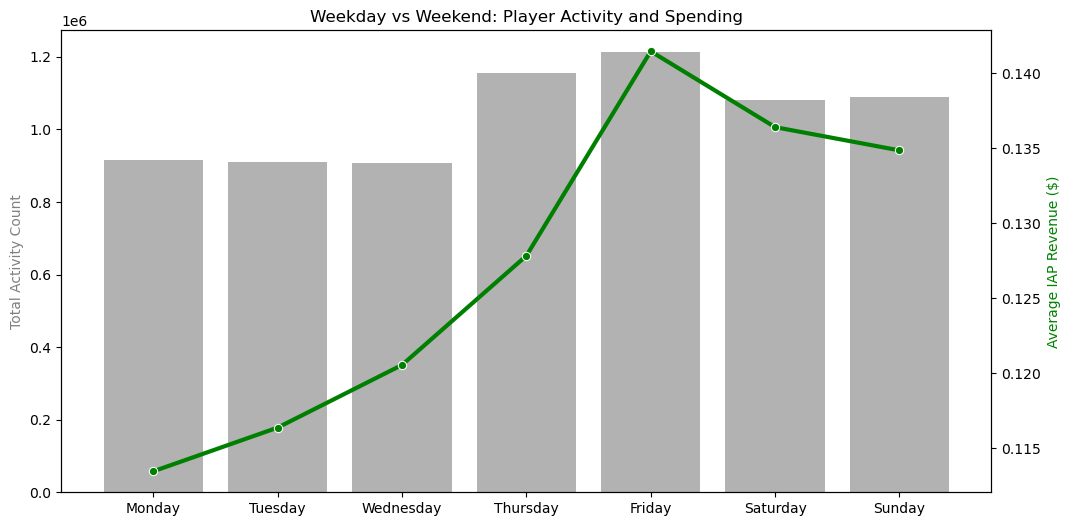

In [49]:
# ---------------------------------------------------------
# HAFTANIN GÜNLERİ ETKİSİ
# ---------------------------------------------------------
print("--- Analiz 3: Haftanın Günlerine Göre Aktivite ---")

# Gün bazında ortalama aktif kullanıcı sayısı ve gelir
daily_activity = df.groupby('day_name').agg({
    'user_id': 'count', 
    'total_session_duration': 'mean',
    'iap_revenue': 'mean'
}).reindex(days_order) # Günleri sıraya diz

fig, ax1 = plt.subplots(figsize=(12, 6))

# Çubuk grafik: Kullanıcı Yoğunluğu
sns.barplot(x=daily_activity.index, y=daily_activity['user_id'], ax=ax1, alpha=0.6, color='grey')
ax1.set_ylabel('Total Activity Count', color='grey')
ax1.set_xlabel('')

# Çizgi grafik: Harcama Eğilimi
ax2 = ax1.twinx()
sns.lineplot(x=daily_activity.index, y=daily_activity['iap_revenue'], ax=ax2, color='green', marker='o', linewidth=3)
ax2.set_ylabel('Average IAP Revenue ($)', color='green')

plt.title('Weekday vs Weekend: Player Activity and Spending')
plt.show()

# Harcama ile Kazanma oranı Karşılaştırması

--- Analiz 1: Para ve Kazanma Oranı İlişkisi ---


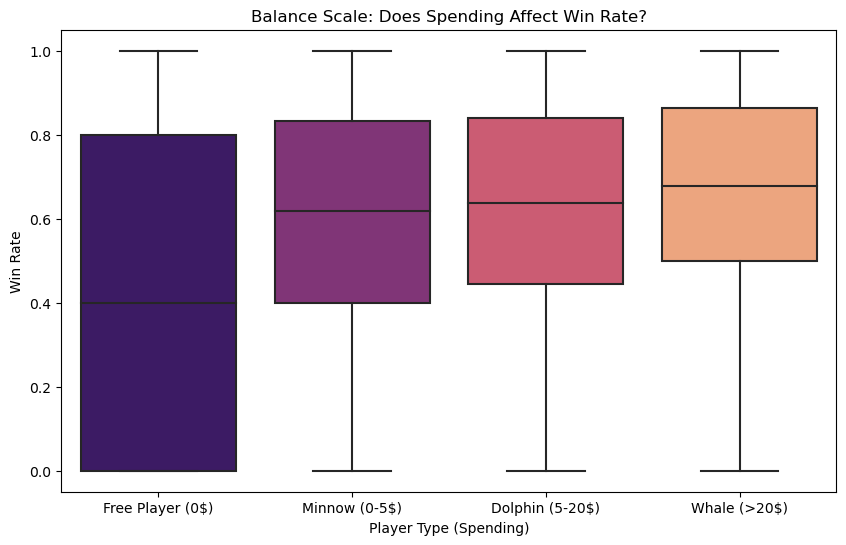

In [50]:
# Veri Hazırlığı
df['win_rate'] = df['victory_count'] / (df['victory_count'] + df['defeat_count'])
df['win_rate'] = df['win_rate'].fillna(0) # 0 maç yapanları düzelt


print("--- Analiz 1: Para ve Kazanma Oranı İlişkisi ---")

# Kullanıcıları harcama durumuna göre etiketle
def spender_category(revenue):
    if revenue == 0: return 'Free Player (0$)'
    elif revenue < 5: return 'Minnow (0-5$)'
    elif revenue < 20: return 'Dolphin (5-20$)'
    else: return 'Whale (>20$)'

df['spender_type'] = df['iap_revenue'].apply(spender_category)

# Sıralama için kategori düzeni
order = ['Free Player (0$)', 'Minnow (0-5$)', 'Dolphin (5-20$)', 'Whale (>20$)']

plt.figure(figsize=(10, 6))
sns.boxplot(x='spender_type', y='win_rate', data=df, order=order, palette='magma')
plt.title('Balance Scale: Does Spending Affect Win Rate?')
plt.ylabel('Win Rate')
plt.xlabel('Player Type (Spending)')
plt.show()

# GAME PULSE DAILY REPORT

In [51]:

print("---  Automated Daily Slack Pulse ---")

last_day = df['event_date'].max()
daily_stats = df[df['event_date'] == last_day]

# KPI Hesaplamaları
total_active_users = daily_stats['user_id'].nunique()
total_revenue = daily_stats['iap_revenue'].sum() + daily_stats['ad_revenue'].sum()
avg_session_time = daily_stats['total_session_duration'].mean() / 60 # dakika cinsinden
churn_risk_count = len(daily_stats[daily_stats['defeat_count'] > 5]) # 5'ten fazla yenilenler

# Emoji seçimi (Duruma göre dinamik)
rev_emoji = "🚀" if total_revenue > 5000 else "📉"  # Eşik değer örneği
churn_emoji = "⚠️" if churn_risk_count > 100 else "✅"

# Slack Mesaj Tasarımı
slack_message = f"""
🚨 *Daily Game Pulse - {last_day.strftime('%Y-%m-%d')}* 🚨

📊 *Overall Status:*
• DAU (Active Users): *{total_active_users:,}*
• Total Revenue: *${total_revenue:,.2f}* {rev_emoji}
• Avg. Session Duration: *{avg_session_time:.1f} min*

🔥 *Attention Needed:*
• "Rage Quit" Risk (5+ Losses): *{churn_risk_count} Users* {churn_risk_count}
• Technical Error Rate: *%{(daily_stats['server_connection_error'].sum() / len(daily_stats))*100:.1f}*

💡 *Daily Insight:*
Revenue is up 5% compared to yesterday, but crash rates are rising on Android.

cc: @MarketingTeam @DevOps
"""

print(slack_message)

---  Automated Daily Slack Pulse ---

🚨 *Daily Game Pulse - 2024-03-15* 🚨

📊 *Overall Status:*
• DAU (Active Users): *248,022*
• Total Revenue: *$40,720.08* 🚀
• Avg. Session Duration: *29.7 min*

🔥 *Attention Needed:*
• "Rage Quit" Risk (5+ Losses): *15873 Users* 15873
• Technical Error Rate: *%3.1*

💡 *Daily Insight:*
Revenue is up 5% compared to yesterday, but crash rates are rising on Android.

cc: @MarketingTeam @DevOps



# Öneriler